### Algorithm:

**--> Step 1:** Open preprocessed dataset  
**--> Step 2:** Convert classes vectors to binary matrices  
**--> Step 3:** Choose **number of Feature Maps**  
**--> Step 4:** Visualize built CNN models  
**--> Step 5:** Set up learning rate & epochs  
**--> Step 6:** Train built CNN models  
**--> Step 7:** Show and plot accuracies  
**--> Step 8:** Make a conclusion  


**Result:**  
- Chosen architecture for every preprocessed dataset  


## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import LearningRateScheduler
from keras.utils.vis_utils import plot_model


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [2]:
with h5py.File('dataset_custom_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [3]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(36288, 48, 48, 3)
(36288,)
(12440, 48, 48, 3)
(12440,)
(3111, 48, 48, 3)
(3111,)


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [4]:
# Showing class index from the vector
print('Class index from vector:', y_train[1])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 43)
y_validation = to_categorical(y_validation, num_classes = 43)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[1])


Class index from vector: 24

(36288, 43)
(12440, 43)

Class index from matrix: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Feature Maps

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [5]:
#Building model 3 with multiple feature map options

# Building 5 models
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 43
# RGB --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 43
# RGB --> {32C5-P2} --> {64C5-P2} --> {128C5-P2} --> 128 --> 43
# RGB --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> 128 --> 43
# RGB --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 128 --> 43


# Defining list to collect models in
model = []


# Building models in a loop
for i in range(5):
    # Initializing model to be as linear stack of layers
    temp = Sequential()

    # Adding first convolutional-pooling pair
    temp.add(Conv2D(8 * (2 ** i), kernel_size=5, padding='same', activation='relu',
                                                                 input_shape=(48, 48, 3)))
    temp.add(MaxPool2D())

    # Adding second convolutional-pooling pair
    temp.add(Conv2D(16 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding third convolutional-pooling pair
    temp.add(Conv2D(32 * (2 ** i), kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())

    # Adding fully connected layers
    temp.add(Flatten())
    temp.add(Dense(128, activation='relu'))
    temp.add(Dense(43, activation='softmax'))

    # Compiling created model
    temp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Adding current model in the list
    model.append(temp)
    

# Check point
print('5 models are compiled successfully')


2021-12-02 09:30:30.781172: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5 models are compiled successfully


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

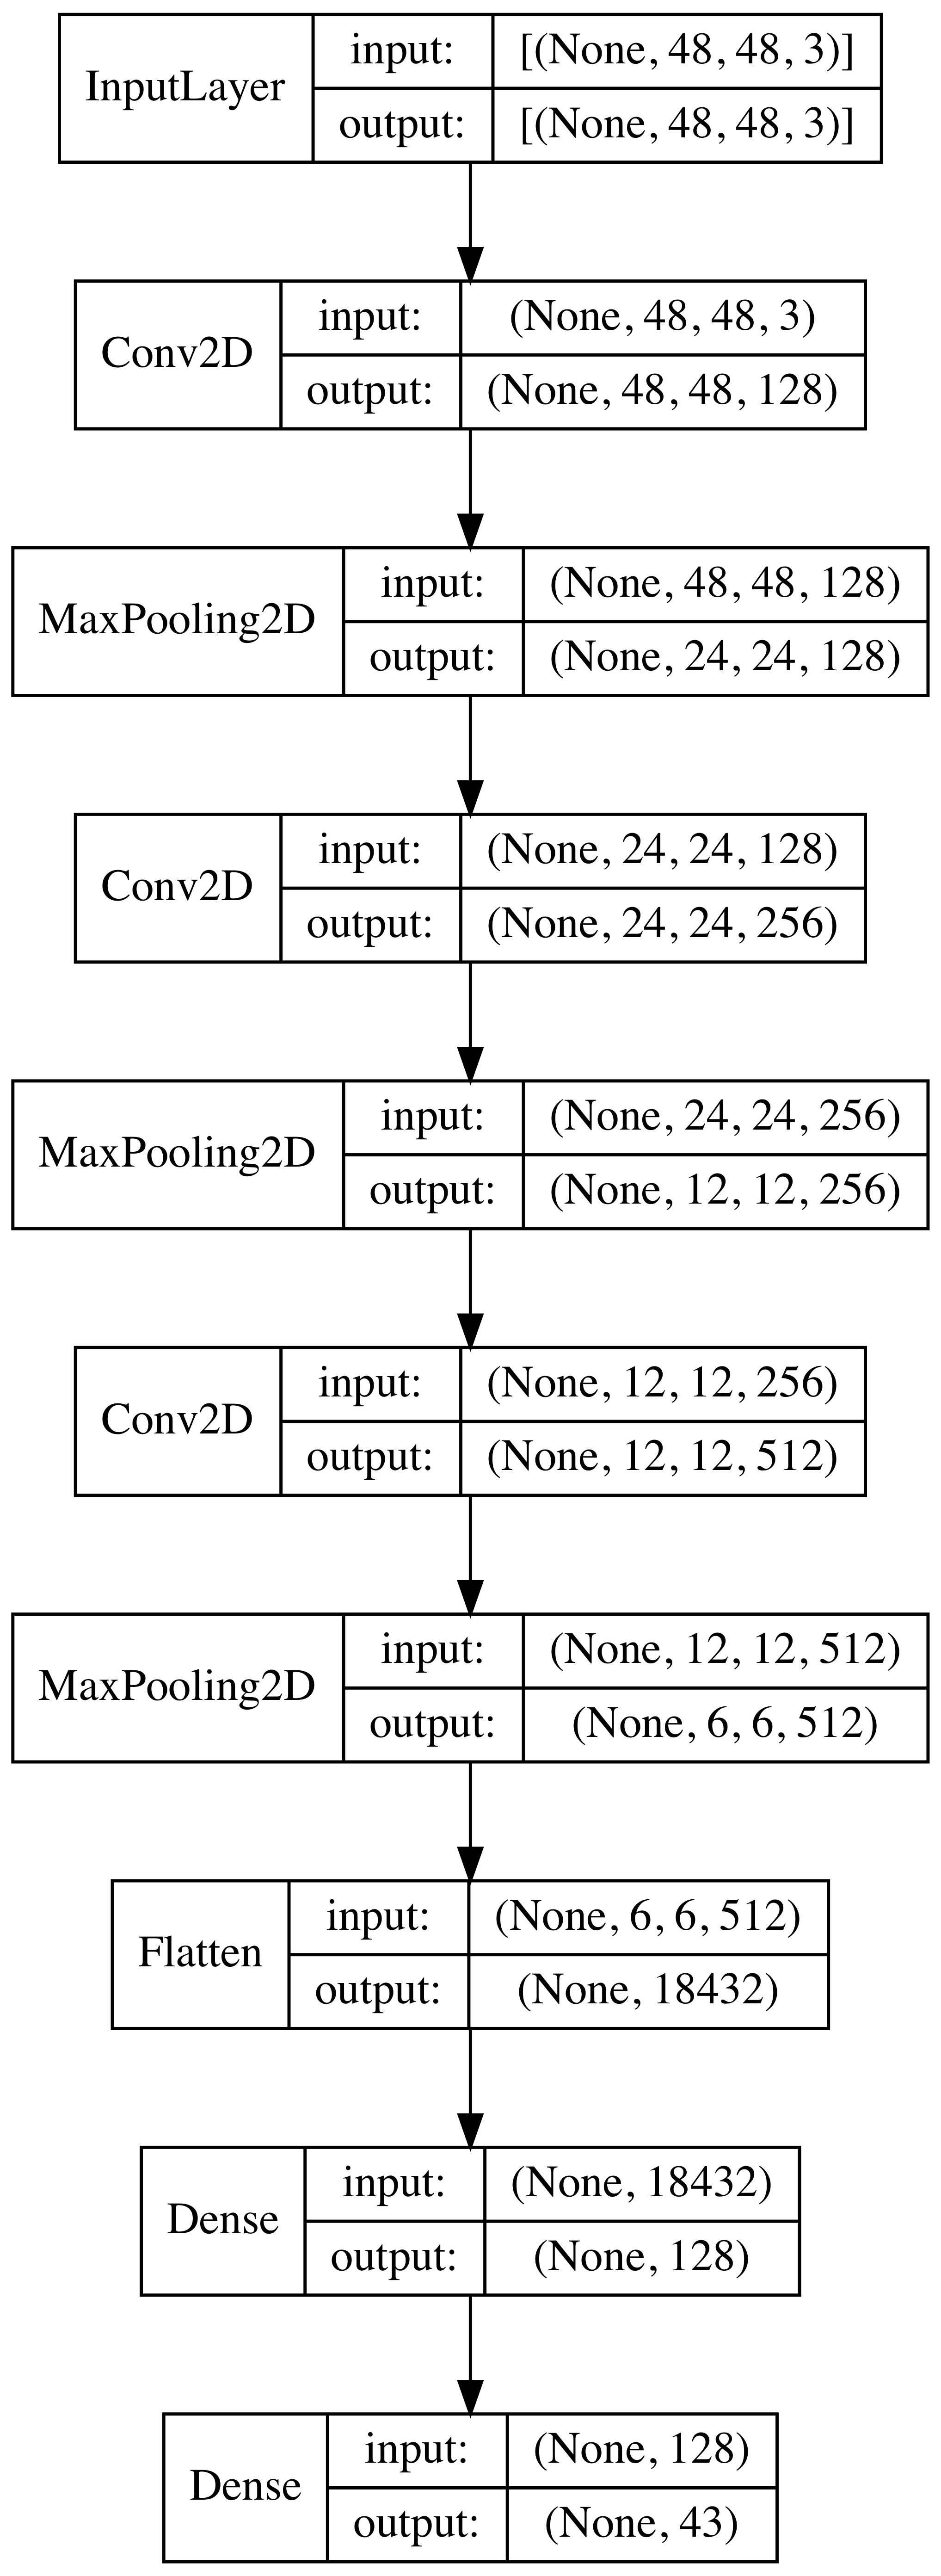

In [6]:
# Plotting model's layers in form of flowchart
plot_model(model[4],
           to_file='model_FM.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [7]:
# Showing model's summary in form of table
model[4].summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 128)       9728      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 256)       819456    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 512)       3277312   
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 512)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)            

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [8]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [9]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Defining list to collect results in
h = []


# Training models in a loop
for i in range(5):
    # Сurrent model
    temp = model[i].fit(x_train, y_train,
                        batch_size=50,
                        epochs=epochs,
                        validation_data=(x_validation, y_validation),
                        callbacks=[learning_rate],
                        verbose=1)
    
    # Adding results of current model in the list
    h.append(temp)


2021-12-02 09:32:31.446301: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0003584859224085419.
726/726 [==============================] - 94s 128ms/step - loss: 1.1419 - accuracy: 0.6900 - val_loss: 0.3066 - val_accuracy: 0.9194
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0003405616262881148.
726/726 [==============================] - 80s 110ms/step - loss: 0.1980 - accuracy: 0.9478 - val_loss: 0.1692 - val_accuracy: 0.9574
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.000323533544973709.
726/726 [==============================] - 81s 112ms/step - loss: 0.1053 - accuracy: 0.9737 - val_loss: 0.1185 - val_accuracy: 0.9700
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.00030735686772502356.
726/726 [==============================] - 69s 94ms/step - loss: 0.0667 - accuracy: 0.9834 - val_loss: 0.0853 - val_accuracy: 0.9809
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.00029198902

726/726 [==============================] - 107s 147ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0420 - val_accuracy: 0.9936
Epoch 17/20

Epoch 00017: LearningRateScheduler setting learning rate to 0.0001577792147882268.
726/726 [==============================] - 109s 150ms/step - loss: 6.8986e-04 - accuracy: 0.9999 - val_loss: 0.0428 - val_accuracy: 0.9936
Epoch 18/20

Epoch 00018: LearningRateScheduler setting learning rate to 0.00014989025404881545.
726/726 [==============================] - 135s 186ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0388 - val_accuracy: 0.9949
Epoch 19/20

Epoch 00019: LearningRateScheduler setting learning rate to 0.00014239574134637466.
726/726 [==============================] - 141s 195ms/step - loss: 5.9429e-05 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 0.9947
Epoch 20/20

Epoch 00020: LearningRateScheduler setting learning rate to 0.00013527595427905592.
726/726 [==============================] - 111s 152ms/step - loss

726/726 [==============================] - 756s 1s/step - loss: 1.0901e-05 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9967
Epoch 12/20

Epoch 00012: LearningRateScheduler setting learning rate to 0.00020390682574579038.
726/726 [==============================] - 690s 951ms/step - loss: 7.4351e-06 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9966
Epoch 13/20

Epoch 00013: LearningRateScheduler setting learning rate to 0.00019371148445850088.
726/726 [==============================] - 697s 960ms/step - loss: 5.1330e-06 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9966
Epoch 14/20

Epoch 00014: LearningRateScheduler setting learning rate to 0.00018402591023557584.
726/726 [==============================] - 820s 1s/step - loss: 3.6937e-06 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 0.9966
Epoch 15/20

Epoch 00015: LearningRateScheduler setting learning rate to 0.000174824614723797.
726/726 [==============================] - 1040s 1s/step - loss:

KeyboardInterrupt: 

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [10]:
# Accuracies of the models
for i in range(4):
    print('Model {0}: Training accuracy={1:.5f}, Validation accuracy={2:.5f}'.
                                                         format(i + 1,
                                                                max(h[i].history['accuracy']),
                                                                max(h[i].history['val_accuracy'])))


Model 1: Training accuracy=1.00000, Validation accuracy=0.99260
Model 2: Training accuracy=1.00000, Validation accuracy=0.99494
Model 3: Training accuracy=1.00000, Validation accuracy=0.99566
Model 4: Training accuracy=1.00000, Validation accuracy=0.99678


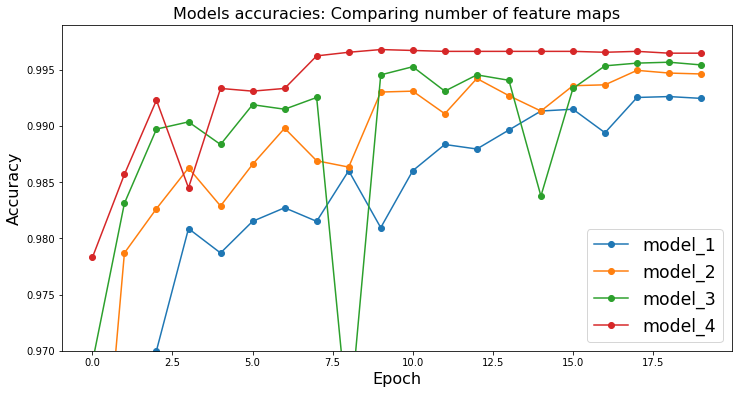

In [19]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.97, 0.999)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4'], loc='lower right',
                                                                    fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: Comparing number of feature maps', fontsize=16)
plt.savefig('FM_Comparison.png', dpi = 500, bbox_inches='tight')

# Showing the plot
plt.show()


In [17]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


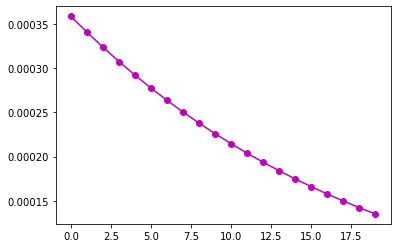

In [18]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [15]:
# The choice for Traffic Signs dataset is 4th model
# RGB input --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> {1024C3-P2} --> 128 --> 43
# GRAY input --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> {1024C3-P2} --> 128 --> 43

# RGB input: (48, 48, 3)
# GRAY input: (48, 48, 1)
